In [1]:
import csv
import pandas as pd
import numpy as np
import datetime
from datetime import timedelta
import os
import itertools
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%load_ext autotime

In [2]:
def save_data_to_file(folder_name, file_name, data):
    try:
        # Create target Directory
        os.mkdir(folder_name)
        print("Directory " , folder_name ,  " Created ") 
    except FileExistsError:
        e = 1
        #print("Directory " , folder_name ,  " already exists")
    data.to_csv(folder_name + "/" + file_name, index=False)

time: 939 µs


In [3]:
def save_data_to_file_with_index(folder_name, file_name, data):
    try:
        # Create target Directory
        os.mkdir(folder_name)
        print("Directory " , folder_name ,  " Created ") 
    except FileExistsError:
        e = 1
        #print("Directory " , folder_name ,  " already exists")
    data.to_csv(folder_name + "/" + file_name)

time: 939 µs


In [4]:
features = [("Old_data/FrequencyOfUserPostsWithoutZeros","std_post_frequency"),
            ("Old_data/FrequencyOfUserPostsWithoutZeros","q3_post_frequency"),
            ("Old_data/NumberOfReceivedResponsesToUsersPostsWithoutZeros","number_of_received_responses_to_users_posts_std"),
            ("Old_data/NumberOfReceivedResponsesToUsersPostsWithoutZeros","number_of_received_responses_to_users_posts_max"),
            ("Old_data/NumberOfReceivedResponsesUnderUsersCommentsWithoutZeros", "number_of_received_responses_under_users_comments_q3"),
            ("Old_data/NumberOfReceivedResponsesUnderUsersCommentsWithoutZeros","number_of_received_responses_under_users_comments_max"),
            ("Old_data/NumberOfWordsInOwnResponsesOfUsersPostsWithoutZeros", "number_of_words_in_own_responses_of_users_posts_q3"),
            ("Old_data/NumberOfWordsInResponsesOfUsersPostsWithoutZeros","nnumber_of_words_in_responses_of_users_posts_median"),
            ("Old_data/SentimentOfUsersPostsWithoutZeros","posts_sentiment_min"),
            ("Old_data/FrequencyOfUserCommentsWithoutZeros", "mean_comments_frequency"),
            ("Old_data/NumberOfWordsInUsersCommentsWithoutZeros","number_of_words_in_users_comments_avg"),
            ("Old_data/NumberOfWordsInUsersPostsWithoutZeros", "number_of_words_in_users_posts_q3"),
            ("Old_data/NumberOfReceivedResponsesToUsersPostsWithoutZeros", "number_of_received_responses_to_users_posts_q3"),
            ("Old_data/NumberOfCommentsWrittenByUserUnderHisOwnPostsWithoutZeros", "number_of_comments_written_by_user_under_his_own_posts_q3")
           ]

time: 1.23 ms


In [5]:
start_date_comments = datetime.date(2008, 12, 9)
end_date_comments = datetime.date(2013,11, 16)

time: 628 µs


In [6]:
pd.read_csv("Old_data/NumberOfReceivedResponsesToUsersPostsWithoutZeros" + "/feature_" + str(start_date_comments) + ".csv")

,user_id,number_of_received_responses_to_users_posts_avg,number_of_received_responses_to_users_posts_std,number_of_received_responses_to_users_posts_median,number_of_received_responses_to_users_posts_q3,number_of_received_responses_to_users_posts_max,number_of_received_responses_to_users_posts_min,start_date,end_date
0,1543,6.0,0,6.0,6.0,6,6,2008-12-09,2013-11-16


In [6]:
def merge_stats(start_date):
    statistics_to_join = []
    for feat in features:
        (file_name, feature) = feat
        statistics_to_join.append(pd.read_csv(file_name + "/feature_" + str(start_date) + ".csv")[['user_id',feature]])
    
    merged_df = statistics_to_join[0]
    for i in range(1, len(statistics_to_join)):
        merged_df = pd.merge(merged_df, statistics_to_join[i],how='outer',on=['user_id'])
    return merged_df.fillna(0)

time: 1.4 ms


In [7]:
def create_cluster_data(start_date, end_date):
    res = merge_stats(start_date)
    start_date += timedelta(days=14)
    while start_date < end_date:
        data = merge_stats(start_date)
        res = pd.concat([res, data], ignore_index=True)
        print(str(start_date))
        #print(str(len(data)) + " " + str(start_date))
        
        start_date += timedelta(days=14)
    save_data_to_file("Cluster_Data_All", "cluster.csv", res)

time: 1.22 ms


In [20]:
create_cluster_data(start_date_comments, end_date_comments)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


2008-12-23
2009-01-06
2009-01-20
2009-02-03
2009-02-17
2009-03-03
2009-03-17
2009-03-31
2009-04-14
2009-04-28
2009-05-12
2009-05-26
2009-06-09
2009-06-23
2009-07-07
2009-07-21
2009-08-04
2009-08-18
2009-09-01
2009-09-15
2009-09-29
2009-10-13
2009-10-27
2009-11-10
2009-11-24
2009-12-08
2009-12-22
2010-01-05
2010-01-19
2010-02-02
2010-02-16
2010-03-02
2010-03-16
2010-03-30
2010-04-13
2010-04-27
2010-05-11
2010-05-25
2010-06-08
2010-06-22
2010-07-06
2010-07-20
2010-08-03
2010-08-17
2010-08-31
2010-09-14
2010-09-28
2010-10-12
2010-10-26
2010-11-09
2010-11-23
2010-12-07
2010-12-21
2011-01-04
2011-01-18
2011-02-01
2011-02-15
2011-03-01
2011-03-15
2011-03-29
2011-04-12
2011-04-26
2011-05-10
2011-05-24
2011-06-07
2011-06-21
2011-07-05
2011-07-19
2011-08-02
2011-08-16
2011-08-30
2011-09-13
2011-09-27
2011-10-11
2011-10-25
2011-11-08
2011-11-22
2011-12-06
2011-12-20
2012-01-03
2012-01-17
2012-01-31
2012-02-14
2012-02-28
2012-03-13
2012-03-27
2012-04-10
2012-04-24
2012-05-08
2012-05-22
2012-06-05

#### Clustering with new names

In [8]:
#mine k = 7

columns = ['start_date',
           'user_id',
           'posts_activity_time',
           'frequency_of_posts_avg',
           'frequency_of_posts_stddev',
           'frequency_of_comments_stddev',
           'frequency_of_comments_q3',
           'number_of_received_responses_to_post_max',
           'number_of_received_responses_to_post_stddev',
           'number_of_received_responses_to_post_avg',
           'number_of_received_responses_under_comments_stddev',
           'number_of_received_responses_under_comments_q3',
           'number_of_received_responses_under_comments_max',
           'number_of_own_post_responses_max', 
           'number_of_words_in_posts_q3',
           'number_of_words_in_comments_median',
           'number_of_words_in_responses_to_posts_q3',
           'number_of_words_in_own_post_responses_q3']

# ,
#            'post_sentiment_stddev',
#            'post_sentiment_q3',
#            'comments_sentiment_q3',
#            'comments_sentiment_stddev',
#            'received_response_sentiment_stddev'


# columns = ['start_date',
#            'user_id',
#            'posts_activity_time',
#            'frequency_of_posts_avg',
#            'frequency_of_posts_stddev',
#            'frequency_of_comments_q3',
#            'number_of_received_responses_to_post_max',
#            'number_of_received_responses_to_post_stddev',
#            'number_of_received_responses_to_post_avg',
#            'number_of_received_responses_to_post_q3',
#            'number_of_received_responses_under_comments_q3',
#            'number_of_received_responses_under_comments_max',
#            'number_of_own_post_responses_q3',
#            'number_of_words_in_posts_q3',
#            'number_of_words_in_comments_median',
#            'number_of_words_in_responses_to_posts_q3',
#            'number_of_words_in_own_post_responses_q3']

# #            'post_sentiment_median',
# #            'post_sentiment_min', 'comments_sentiment_median', 'received_response_sentiment_stddev'

time: 1.07 ms


In [9]:
feature_table = pd.read_csv("FeatureTableCSV.csv", sep=";")

time: 5.46 ms


In [10]:
start_date_comments = datetime.date(2009, 12, 22)
end_date_comments = datetime.date(2013,10, 22)

time: 633 µs


In [11]:
def generate_stats_for_entire_data(feature_table, start_date, end_date):
    results = pd.DataFrame()
    while start_date < end_date:
        features = pd.read_csv("All_Data_In_Slots_Joined/" + str(start_date) + "_joined.csv")
        features.insert(1, 'start_date', start_date)
        results = pd.concat([results, features], ignore_index=True)
        start_date += timedelta(days=14)
    return results

time: 1.38 ms


In [12]:
def save_clustering_data(columns, feature_table, start_date_comments, end_date_comments):
    alldata = generate_stats_for_entire_data(feature_table, start_date_comments, end_date_comments)[columns]
    save_data_to_file("Cluster_Data_All", "cluster.csv", alldata)

time: 792 µs


In [13]:
save_clustering_data(columns, feature_table, start_date_comments, end_date_comments)

time: 3min 7s


In [12]:
start_date_clustering = datetime.date(2009, 12, 8)
end_date_clustering = datetime.date(2013,10, 22)

time: 652 µs


In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift

time: 1.43 s


In [14]:
def benchmark_custering(X):
    columns=['eps', 'score_mean', 'scored_std']
    results = pd.DataFrame(columns=columns)
    print("Benchmarking..")
    eps = [0.01, 0.1, 0.5, 1., 2.]
    for e in eps:
        scores = []
        model = DBSCAN(eps=e).fit(X)
        labels = model.labels_
        scores.append(metrics.calinski_harabasz_score(X, labels))
        print("Clustering done for sample: " + str(0))
        row = pd.DataFrame([[e, np.mean(scores), np.std(scores)]], columns=columns)
        results = pd.concat([row, results], ignore_index=True)
        print("Clustering done for: " + str(e))
    return results

time: 2.1 ms


In [16]:
def generate_benchmark_clustering_data():
    df = pd.read_csv("Cluster_Data_All" + "/cluster.csv").drop(columns =["user_id", "start_date"])
    df = df.sample(frac=0.05, replace=True, random_state=1)
    X = MinMaxScaler().fit_transform(df)
#     X  = df
    results = benchmark_custering(X)
    print(results)
    save_data_to_file("Cluster_Benchmarks_All", "DBSCAN_cluster_benchmark.csv", results)
    print("Results for {} saved")
    

time: 1.25 ms


In [ ]:
generate_benchmark_clustering_data()

Benchmarking..
Clustering done for sample: 0
Clustering done for: 0.01


In [12]:
# %%time

# df = pd.read_csv("Cluster_Data_All" + "/cluster.csv").drop(columns =["user_id", "start_date"])
# X = MinMaxScaler().fit_transform(df)
# model = DBSCAN(eps=.01).fit(X)
# labels = model.labels_
# score = metrics.calinski_harabasz_score(X, labels)
# print(score)

time: 326 µs


In [ ]:
# %%time

# df = pd.read_csv("Cluster_Data_All" + "/cluster.csv").drop(columns =["user_id", "start_date"])
# X = MinMaxScaler().fit_transform(df)
# model = MeanShift().fit(X)
# labels = model.labels_
# score = metrics.calinski_harabasz_score(X, labels)
# print(score)

0    6.654077e+06
1    6.704965e+06
2    6.519707e+06
3    6.425955e+06
4    6.521393e+06
5    6.704423e+06
6    7.461531e+06
Name: score_mean, dtype: float64
0     6608.303534
1     2052.120674
2      150.416434
3    41985.302663
4        0.103116
5        5.160422
6        0.000787
Name: scored_std, dtype: float64


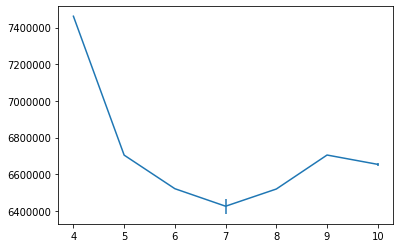

,k,score_mean,scored_std
0,10,6.654077e+06,6608.303534
1,9,6.704965e+06,2052.120674
2,8,6.519707e+06,150.416434
3,7,6.425955e+06,41985.302663
4,6,6.521393e+06,0.103116
5,5,6.704423e+06,5.160422
6,4,7.461531e+06,0.000787


In [71]:

df = pd.read_csv("Cluster_Benchmarks_All/cluster_benchmark.csv")

x = df["eps"]
y = df["score_mean"]
print(y)
print(df["scored_std"])
yerr = df["scored_std"]
plt.errorbar(x,y,yerr=yerr)
plt.show()
# plt.errorbar('k', 'calinski_harabaz_score', yerr='std', data=df, marker='o', linestyle='solid',
#              ecolor='darkred', capsize=3, markersize=3, capthick=2)
# plt.xticks(range(2,16))
# plt.xlabel('clusters number')
# plt.ylabel('Calinski Harabaz score')
# plt.title('K-means clustering evaluation')
# plt.show()
df

In [13]:
def cluster_data():
    data_to_cluster = pd.read_csv("Cluster_Data_All" + "/cluster.csv")
    data_without_id = data_to_cluster.drop(columns =["user_id", "start_date"])
    
    X = MinMaxScaler().fit_transform(data_without_id)
    model = MeanShift(n_jobs=-1).fit(data_without_id)
    labels_df = pd.DataFrame(model.labels_, columns=["label"])
    labeled_users = pd.concat([data_to_cluster, labels_df], axis=1)
    cluster_df = pd.DataFrame(model.cluster_centers_, columns=data_without_id.columns.values)
    
    save_data_to_file("All_Labeled_users", "MeanShift_labeled_users.csv", labeled_users)
    save_data_to_file("All_Cluster_centers", "MeanShift_cluster_centers.csv", cluster_df)

# for index, row in df.iterrows():
#     data_to_cluster = pd.read_csv("Cluster_Data" + "/cluster" + row["date"] + ".csv")
#     data_without_id = data_to_cluster.drop(columns =["user_id"])
#     data_to_cluster
#     X = MinMaxScaler().fit_transform(data_without_id)
#     kmeans = KMeans(n_clusters=7).fit(X)
#     labels_df = pd.DataFrame(kmeans.labels_, columns=["label"])
#     labeled_users = pd.concat([data_to_cluster, labels_df], axis=1)
#     cluster_df = pd.DataFrame(kmeans.cluster_centers_, columns=data_without_id.columns.values)
    
#     save_data_to_file("Labeled_users", "labeled_users"+ row["date"] +".csv", labeled_users)
#     save_data_to_file("Cluster_centers", "cluster_centers"+ row["date"] +".csv", cluster_df)

time: 1.68 ms


In [ ]:
cluster_data()

In [102]:
df = pd.read_csv("All_Labeled_users" + "/labeled_users.csv")[["user_id","label","start_date"]]
len(df.index)

4988612

In [103]:
df.memory_usage()

Index              128
user_id       39908896
label         39908896
start_date    39908896
dtype: int64

In [8]:
def generate_normalized_statistics():
    stats = [np.min, np.mean, np.max, np.std]
    column_names = columns={'mean': 'mean','min': 'amin', 'max': 'amax', 'std':'std'}
    
    #get sample feature names and create aggregats eg {'std_post_frequency': [np.mean, np.std, np.min, np.max]}
    df = pd.read_csv("All_Labeled_users" + "/labeled_users.csv").drop(columns =["user_id", "start_date"])
    features = df.drop(columns =["label"]).columns.values
    aggreagates = { feat : stats for feat in features }
    
#     df = pd.read_csv("Labeled_users" + "/labeled_users" + str(start_date) + ".csv").drop(columns =["user_id"])
        
    stats = (df.groupby(['label']).agg(aggreagates).rename(column_names))
    all_feature = pd.read_csv("Cluster_Data_All" + "/cluster.csv").drop(columns =["user_id", "start_date"])
    divisors = []
    for feat in all_feature.columns.values:
        max_v = all_feature[feat].max()
        divisors.append(max_v)
        divisors.append(max_v)
        divisors.append(max_v)
        divisors.append(max_v)
    normalized = stats.div(divisors, axis='columns')
    return normalized.T
#     stats_trans_df = stats.T
        
#     save_data_to_file_with_index("All_Normalized_ClustersStatistics", "clusters_stats.csv", stats_trans_df)

In [11]:
norm_stats = generate_normalized_statistics().round(5)
display(HTML(norm_stats.to_html()))

In [12]:
print(norm_stats.to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
                                         & label &        0 &        1 &        2 &        3 &        4 &        5 &        6 \\
\midrule
posts\_activity\_time & amin &  0.00000 &  0.00000 &  0.00000 &  0.00000 &  0.00000 &  0.00000 &  0.42857 \\
                                         & mean &  0.00131 &  0.88460 &  0.87933 &  0.00001 &  0.87436 &  0.70467 &  0.82908 \\
                                         & amax &  1.00000 &  0.96429 &  1.00000 &  0.96429 &  0.96429 &  0.96429 &  0.96429 \\
                                         & std &  0.03333 &  0.14615 &  0.15476 &  0.00232 &  0.17364 &  0.32080 &  0.16994 \\
frequency\_of\_posts\_avg & amin &  0.00000 &  0.00246 &  0.00246 &  0.00000 &  0.00246 &  0.00246 &  0.00982 \\
                                         & mean &  0.00004 &  0.04263 &  0.04001 &  0.00000 &  0.04108 &  0.01954 &  0.02477 \\
                                         & amax &  0.43094 &  0.24064 &  0.23082 &  0.05218 &

In [97]:
def generate_custer_statistics():
    stats = [np.mean, np.std, np.min, np.max]
    column_names = columns={'mean': 'mean','std': 'stddev', 'amin': 'min', 'amax': 'max'}
    
    #get sample feature names and create aggregats eg {'std_post_frequency': [np.mean, np.std, np.min, np.max]}
    df = pd.read_csv("All_Labeled_users" + "/labeled_users.csv").drop(columns =["user_id", "start_date"])
    features = df.drop(columns =["label"]).columns.values
    aggreagates = { feat : stats for feat in features }
    
#     df = pd.read_csv("Labeled_users" + "/labeled_users" + str(start_date) + ".csv").drop(columns =["user_id"])
        
    stats = (df.groupby(['label']).agg(aggreagates).rename(column_names))
    stats_trans_df = stats.T
        
    save_data_to_file_with_index("All_ClustersStatistics", "clusters_stats.csv", stats_trans_df)


In [98]:
generate_custer_statistics()

In [99]:
df = pd.read_csv("All_ClustersStatistics" + "/clusters_stats.csv")

In [100]:
df = pd.read_csv("All_ClustersStatistics" + "/clusters_stats.csv")
display(HTML(df.reset_index(level=[0]).to_html()))

,index,Unnamed: 0,Unnamed: 1,0,1,2,3,4,5,6
0,0,posts_activity_time,mean,0.036685,24.768852,24.621221,0.000193,24.482143,19.730694,23.214286
1,1,posts_activity_time,amin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
2,2,posts_activity_time,amax,28.000000,27.000000,28.000000,27.000000,27.000000,27.000000,27.000000
3,3,frequency_of_posts_avg,mean,0.017139,17.361885,16.295446,0.000099,16.731399,7.956452,10.089286
4,4,frequency_of_posts_avg,amin,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,4.000000
5,5,frequency_of_posts_avg,amax,175.500000,98.000000,94.000000,21.250000,78.750000,407.250000,36.750000
6,6,frequency_of_posts_stddev,mean,0.005199,4.727392,4.481569,0.000018,5.286799,2.444235,3.436091
7,7,frequency_of_posts_stddev,amin,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.577350
8,8,frequency_of_posts_stddev,amax,246.780267,22.954665,40.041645,3.785939,25.513069,227.139458,15.585784
9,9,frequency_of_comments_stddev,mean,1.374720,0.012326,0.013684,0.353985,0.044643,0.028344,0.000000


In [101]:
print(df.to_latex())

\begin{tabular}{lllrrrrrrr}
\toprule
{} &                                         Unnamed: 0 & Unnamed: 1 &            0 &            1 &            2 &            3 &             4 &             5 &             6 \\
\midrule
0  &                                posts\_activity\_time &       mean &     0.036685 &    24.768852 &    24.621221 &     0.000193 &     24.482143 &     19.730694 &     23.214286 \\
1  &                                posts\_activity\_time &       amin &     0.000000 &     0.000000 &     0.000000 &     0.000000 &      0.000000 &      0.000000 &     12.000000 \\
2  &                                posts\_activity\_time &       amax &    28.000000 &    27.000000 &    28.000000 &    27.000000 &     27.000000 &     27.000000 &     27.000000 \\
3  &                             frequency\_of\_posts\_avg &       mean &     0.017139 &    17.361885 &    16.295446 &     0.000099 &     16.731399 &      7.956452 &     10.089286 \\
4  &                             frequency\_o

In [89]:
df2 = df.reset_index(level=[0])

In [95]:
def seperate_cluster_data(df2):
    df2.columns = ["index", "feature", "stat", "0","1","2","3","4","5","6"]
    all_feature = df2['feature'].drop_duplicates()
    all_clusters = df2.columns.values
    for clust in all_clusters:
        data = []
        for feat in all_feature:
            stats = df2.loc[df2["feature"] == feat][clust]
            row = [feat]
            row.extend(stats)
            data.append(row)

        stat_df = pd.DataFrame(data, columns = ["feature_name", "mean", "std", "min", "max"])
        save_data_to_file_with_index("ClusterSeparetStats", str(clust) + "_clusters_stats.csv", stat_df)

In [96]:
seperate_cluster_data(df2)

In [105]:
cluster_0 = pd.read_csv("ClusterSeparetStats" + "/0_clusters_stats.csv")
print(cluster_0.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &       mean &        std &  min &          max \\
\midrule
0  &           0 &                                posts\_activity\_time &   0.036685 &   0.933278 &  0.0 &    28.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &   0.017139 &   0.581066 &  0.0 &   175.500000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &   0.005199 &   0.234265 &  0.0 &   246.780267 \\
3  &           3 &                       frequency\_of\_comments\_stddev &   1.374720 &   4.025709 &  0.0 &   355.674711 \\
4  &           4 &                           frequency\_of\_comments\_q3 &   3.686384 &   6.403491 &  0.0 &   451.250000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &   0.184602 &   7.142037 &  0.0 &  1221.000000 \\
6  &           6 &        number\_of\_received\_responses\_to\_post\_stddev &   0.036575 

In [106]:
cluster_1 = pd.read_csv("ClusterSeparetStats" + "/1_clusters_stats.csv")
print(cluster_1.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &         mean &          std &          min &          max \\
\midrule
0  &           0 &                                posts\_activity\_time &    24.768852 &     4.092207 &     0.000000 &    27.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &    17.361885 &    15.784231 &     1.000000 &    98.000000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &     4.727392 &     4.015840 &     0.000000 &    22.954665 \\
3  &           3 &                       frequency\_of\_comments\_stddev &     0.012326 &     0.144640 &     0.000000 &     2.828427 \\
4  &           4 &                           frequency\_of\_comments\_q3 &     0.063525 &     0.334094 &     0.000000 &     4.000000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &  6274.121311 &  1497.379701 &  4165.000000 &  9884.000000 \\
6  & 

In [107]:
cluster_2 = pd.read_csv("ClusterSeparetStats" + "/2_clusters_stats.csv")
print(cluster_2.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &         mean &         std &          min &          max \\
\midrule
0  &           0 &                                posts\_activity\_time &    24.621221 &    4.333322 &     0.000000 &    28.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &    16.295446 &   14.455229 &     1.000000 &    94.000000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &     4.481569 &    4.046111 &     0.000000 &    40.041645 \\
3  &           3 &                       frequency\_of\_comments\_stddev &     0.013684 &    0.170065 &     0.000000 &     4.041452 \\
4  &           4 &                           frequency\_of\_comments\_q3 &     0.089703 &    0.439769 &     0.000000 &     7.500000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &  2328.241301 &  836.763232 &  1225.000000 &  4316.000000 \\
6  &        

In [108]:
cluster_3 = pd.read_csv("ClusterSeparetStats" + "/3_clusters_stats.csv")
print(cluster_3.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &        mean &        std &   min &          max \\
\midrule
0  &           0 &                                posts\_activity\_time &    0.000193 &   0.064954 &   0.0 &    27.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &    0.000099 &   0.040063 &   0.0 &    21.250000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &    0.000018 &   0.007286 &   0.0 &     3.785939 \\
3  &           3 &                       frequency\_of\_comments\_stddev &    0.353985 &   1.461401 &   0.0 &    82.024387 \\
4  &           4 &                           frequency\_of\_comments\_q3 &    1.948413 &   2.478076 &   1.0 &   121.500000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &    0.000599 &   0.178264 &   0.0 &    84.000000 \\
6  &           6 &        number\_of\_received\_responses\_to\_post\_stddev

In [109]:
cluster_4 = pd.read_csv("ClusterSeparetStats" + "/4_clusters_stats.csv")
print(cluster_4.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &          mean &          std &          min &           max \\
\midrule
0  &           0 &                                posts\_activity\_time &     24.482143 &     4.862028 &     0.000000 &     27.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &     16.731399 &    15.325590 &     1.000000 &     78.750000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &      5.286799 &     4.985706 &     0.000000 &     25.513069 \\
3  &           3 &                       frequency\_of\_comments\_stddev &      0.044643 &     0.311590 &     0.000000 &      3.000000 \\
4  &           4 &                           frequency\_of\_comments\_q3 &      0.165179 &     0.751540 &     0.000000 &      6.500000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &  13598.133929 &  2489.882553 &  9821.000000 &  19426.0

In [110]:
cluster_5 = pd.read_csv("ClusterSeparetStats" + "/5_clusters_stats.csv")
print(cluster_5.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &        mean &         std &    min &           max \\
\midrule
0  &           0 &                                posts\_activity\_time &   19.730694 &    8.982325 &    0.0 &     27.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &    7.956452 &   12.086023 &    1.0 &    407.250000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &    2.444235 &    4.219114 &    0.0 &    227.139458 \\
3  &           3 &                       frequency\_of\_comments\_stddev &    0.028344 &    0.335870 &    0.0 &     13.051181 \\
4  &           4 &                           frequency\_of\_comments\_q3 &    0.137777 &    0.775740 &    0.0 &     36.250000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &  203.028526 &  280.290586 &    0.0 &   1320.000000 \\
6  &           6 &        number\_of\_received\_respon

In [111]:
cluster_6 = pd.read_csv("ClusterSeparetStats" + "/6_clusters_stats.csv")
print(cluster_6.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &          mean &          std &           min &           max \\
\midrule
0  &           0 &                                posts\_activity\_time &     23.214286 &     4.758451 &     12.000000 &     27.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &     10.089286 &    10.325290 &      4.000000 &     36.750000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &      3.436091 &     4.132013 &      0.577350 &     15.585784 \\
3  &           3 &                       frequency\_of\_comments\_stddev &      0.000000 &     0.000000 &      0.000000 &      0.000000 \\
4  &           4 &                           frequency\_of\_comments\_q3 &      0.000000 &     0.000000 &      0.000000 &      0.000000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &  32259.428571 &  9276.192071 &  23261.000000 &  

In [42]:
cluster_7 = pd.read_csv("ClusterSeparetStats" + "/7_clusters_stats.csv")
print(cluster_7.to_latex())

\begin{tabular}{lrlrrrr}
\toprule
{} &  Unnamed: 0 &                                       feature\_name &          mean &          std &           min &           max \\
\midrule
0  &           0 &                                posts\_activity\_time &     24.511905 &     5.114341 &      0.000000 &     27.000000 \\
1  &           1 &                             frequency\_of\_posts\_avg &     17.232143 &    16.363692 &      1.000000 &     78.750000 \\
2  &           2 &                          frequency\_of\_posts\_stddev &      5.208438 &     4.974145 &      0.000000 &     25.513069 \\
3  &           3 &                       frequency\_of\_comments\_stddev &      0.059524 &     0.359088 &      0.000000 &      3.000000 \\
4  &           4 &                           frequency\_of\_comments\_q3 &      0.196429 &     0.853829 &      0.000000 &      6.500000 \\
5  &           5 &           number\_of\_received\_responses\_to\_post\_max &  14878.190476 &  2390.054319 &  11285.000000 &  

In [ ]:
cluster_8 = pd.read_csv("ClusterSeparetStats" + "/8_clusters_stats.csv")
print(cluster_8.to_latex())